       customer_id           age        gender       balance  num_of_products  \
count  10000.00000  10000.000000  10000.000000  10000.000000     10000.000000   
mean    4999.50000     53.539700      1.002000  49862.061574         2.498400   
std     2886.89568     20.757324      0.813672  28882.207393         1.112259   
min        0.00000     18.000000      0.000000      0.929598         1.000000   
25%     2499.75000     36.000000      0.000000  24792.455695         2.000000   
50%     4999.50000     53.000000      1.000000  49504.432498         2.000000   
75%     7499.25000     72.000000      2.000000  74861.529317         3.000000   
max     9999.00000     89.000000      2.000000  99982.216536         4.000000   

       credit_score        tenure  active_member  estimated_salary  \
count   10000.00000  10000.000000   10000.000000      10000.000000   
mean      576.51030     14.483700       0.503600      65614.336710   
std       158.29431      8.667817       0.500012      31784.

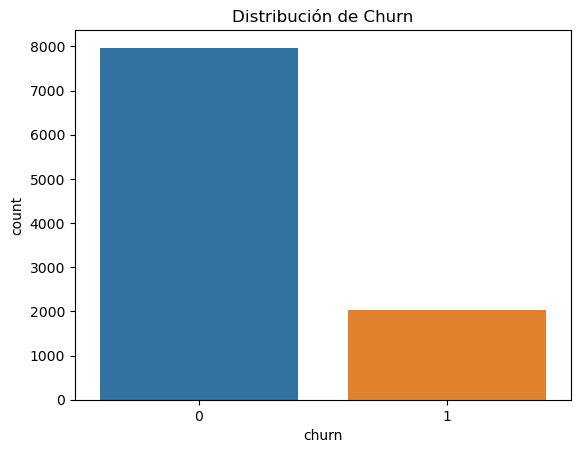

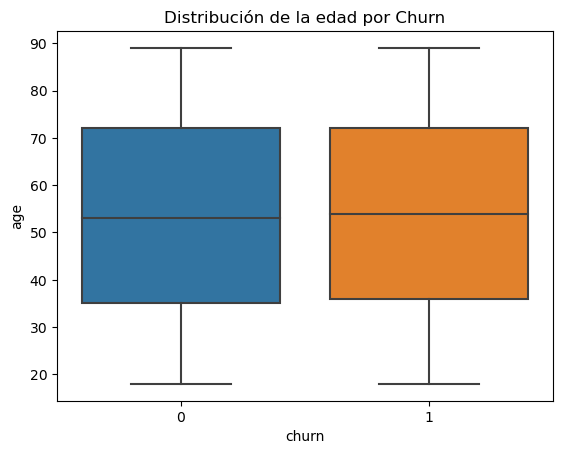

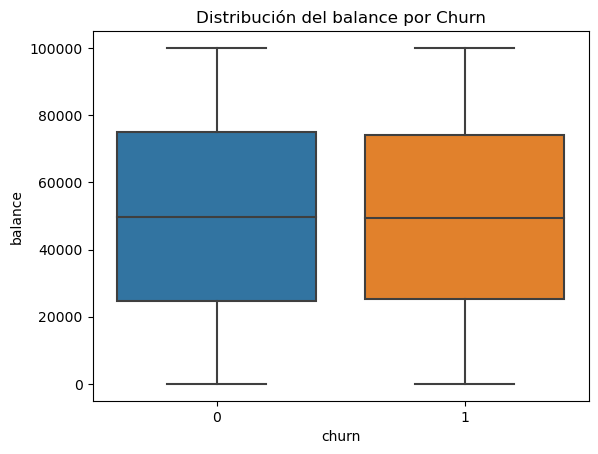

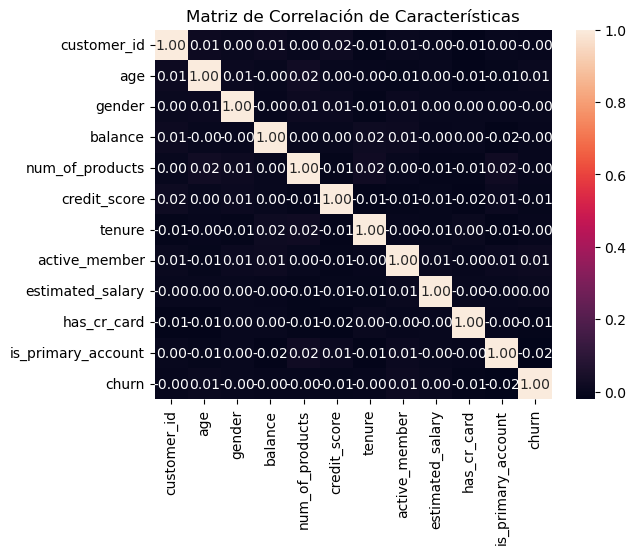

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Supongamos que el df_churn_full ya está cargado como se generó previamente.

# Realizar el análisis exploratorio de datos
print(df_churn_full.describe(include='all'))
print(df_churn_full.info())
print(df_churn_full.isnull().sum())  # Verificar si hay valores faltantes

# Visualizar la distribución de la variable 'churn'
sns.countplot(x='churn', data=df_churn_full)
plt.title('Distribución de Churn')
plt.show()

# Visualizar la distribución de la variable 'age' diferenciada por la variable 'churn'
sns.boxplot(x='churn', y='age', data=df_churn_full)
plt.title('Distribución de la edad por Churn')
plt.show()

# Relación entre 'balance' y 'churn'
sns.boxplot(x='churn', y='balance', data=df_churn_full)
plt.title('Distribución del balance por Churn')
plt.show()

# Realizar una matriz de correlación
corr_matrix = df_churn_full.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.title('Matriz de Correlación de Características')
plt.show()


In [8]:
# Codificar la variable 'gender'
label_encoder = LabelEncoder()
df_churn_full['gender'] = label_encoder.fit_transform(df_churn_full['gender'])

# Escalar las variables numéricas
features = ['age', 'balance', 'num_of_products', 'credit_score', 'tenure', 'estimated_salary']
scaler = StandardScaler()
df_churn_full[features] = scaler.fit_transform(df_churn_full[features])

# Separar características y etiqueta
X = df_churn_full.drop(['customer_id', 'churn'], axis=1)
y = df_churn_full['churn']


In [9]:
# Continuaremos con el preprocesamiento de datos, la selección de características, y luego la construcción y evaluación del modelo.

# Preprocesamiento de datos para el modelo de clasificación.
# Codificar variables categóricas
gender_encoder = LabelEncoder()
df_churn_full['gender'] = gender_encoder.fit_transform(df_churn_full['gender'])

# Normalizar las variables numéricas
scaler = StandardScaler()
scaled_features = df_churn_full[['age', 'balance', 'num_of_products', 'credit_score', 'tenure', 'estimated_salary']]
scaled_features = scaler.fit_transform(scaled_features)

# Crear un nuevo DataFrame con las características escaladas
df_scaled = pd.DataFrame(scaled_features, columns=['age', 'balance', 'num_of_products', 'credit_score', 'tenure', 'estimated_salary'])
# Añadir las columnas codificadas y la variable de salida
df_scaled['gender'] = df_churn_full['gender']
df_scaled['active_member'] = df_churn_full['active_member']
df_scaled['has_cr_card'] = df_churn_full['has_cr_card']
df_scaled['is_primary_account'] = df_churn_full['is_primary_account']
df_scaled['churn'] = df_churn_full['churn']

# Dividir el conjunto de datos en entrenamiento y prueba
X = df_scaled.drop('churn', axis=1)
y = df_scaled['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de clasificación
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predecir el churn en el conjunto de prueba
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Mostrar el informe de clasificación y la puntuación AUC
print(classification_report(y_test, y_pred))
print("ROC AUC score:", roc_auc_score(y_test, y_pred_proba))

# Selección de Características utilizando la importancia dada por el modelo RandomForest
feature_importances = clf.feature_importances_
features = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
print(features.sort_values(by='Importance', ascending=False))



              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1588
           1       0.33      0.00      0.00       412

    accuracy                           0.79      2000
   macro avg       0.56      0.50      0.44      2000
weighted avg       0.70      0.79      0.70      2000

ROC AUC score: 0.5108695984446455
              Feature  Importance
1             balance    0.194662
5    estimated_salary    0.191485
3        credit_score    0.187243
0                 age    0.150242
4              tenure    0.124961
2     num_of_products    0.050151
6              gender    0.038608
8         has_cr_card    0.024586
7       active_member    0.019588
9  is_primary_account    0.018475
